In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import plotly.express as px
import scipy.stats as stats
from tqdm.notebook import tqdm
from IPython.display import Image, Video

In [2]:
step = 1e-3;

In [13]:
energy = pd.read_csv("energy.csv")
energy

,t,Potential,Kinetic,Total,Virial
0,100,-2432.129883,12.343084,-2419.783936,-21.102541
1,200,-2432.019775,12.139586,-2419.879150,-241.545303
2,300,-2434.667725,14.835365,-2419.830811,-719.006042
3,400,-2429.947754,10.123097,-2419.823975,-693.800659
4,500,-2429.365967,9.511192,-2419.855469,-1019.106812
...,...,...,...,...,...
294,29500,-2431.495605,11.649430,-2419.846191,-694.108093
295,29600,-2431.140137,11.298161,-2419.841064,-722.741516
296,29700,-2430.598633,10.753105,-2419.843506,-732.231384
297,29800,-2431.151123,11.303705,-2419.847900,-814.953613


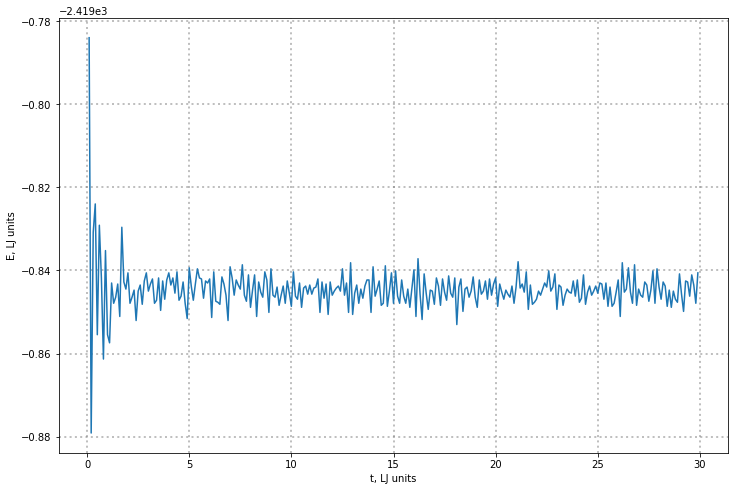

In [14]:
plt.plot(energy["t"]*step, energy['Total'])
plt.rcParams['figure.figsize'] = [12, 8]
#plt.ylim(-2420, -2419.8)
plt.grid(b=True, color='Grey', alpha=0.5, linestyle=':', linewidth=2)
plt.xlabel(r"t, LJ units")
plt.ylabel("E, LJ units")
plt.savefig("asdasdas.png")

In [15]:
fluct = energy['Total'].std()/energy['Total'].mean()
fluct

-2.3255189483982822e-06

In [16]:
df = pd.read_csv("dc/start.dat", sep=' ', names= ['x','y','z','vx','vy','vz','1','2','3','4','5','6','7','8'])
del df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8']

In [23]:
dr = 0.04
r = np.arange(0, 4.0, dr)
rho = 0.512
particles = 512
cell = 10
g = np.zeros(len(r))
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['z'])
for n in tqdm(range(0,particles), desc="Points"):
    x0=x[n]
    y0=y[n]
    z0=z[n]
    rx = x0 - x
    ry = y0 - y
    rz = z0 - z
    rx -= np.rint(rx/cell)*cell
    ry -= np.rint(ry/cell)*cell
    rz -= np.rint(rz/cell)*cell
    rt = np.sqrt(rx*rx+ry*ry+rz*rz)
    rt = np.trunc(rt/dr)
    for j in rt:
        if j<len(g) and j>1:
            rc = j*dr
            g[int(j)]+=1/(4*rho*np.pi*rc*rc*dr)

g = g/particles

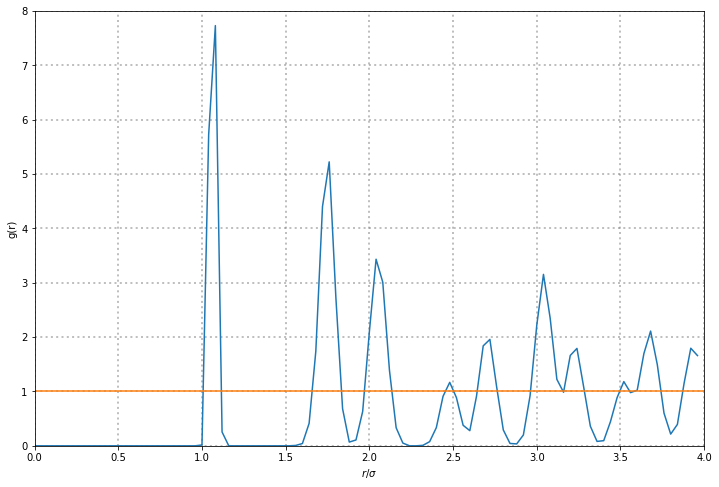

In [28]:
plt.plot(r, g)
plt.plot(np.arange(0, 5, 1), np.ones(5))
plt.rcParams['figure.figsize'] = [12, 8]
plt.grid(b=True, color='Grey', alpha=0.5, linestyle=':', linewidth=2)
plt.xlabel(r"$r/\sigma$")
plt.ylabel("g(r)")
plt.ylim(0,8)
plt.xlim(0,4)
plt.savefig("./report/images/radial.png")

In [31]:
for idx, val in enumerate(g):
  print("index is %d and value is %s" % (idx, val))

index is 0 and value is 0.0
index is 1 and value is 0.0
index is 2 and value is 0.0
index is 3 and value is 0.0
index is 4 and value is 0.0
index is 5 and value is 0.0
index is 6 and value is 0.0
index is 7 and value is 0.0
index is 8 and value is 0.0
index is 9 and value is 0.0
index is 10 and value is 0.0
index is 11 and value is 0.0
index is 12 and value is 0.0
index is 13 and value is 0.0
index is 14 and value is 0.0
index is 15 and value is 0.0
index is 16 and value is 0.0
index is 17 and value is 0.0
index is 18 and value is 0.0
index is 19 and value is 0.0
index is 20 and value is 0.0
index is 21 and value is 0.0
index is 22 and value is 0.0
index is 23 and value is 0.0
index is 24 and value is 0.0
index is 25 and value is 0.01517819815558389
index is 26 and value is 5.725503742121139
index is 27 and value is 7.729637949603146
index is 28 and value is 0.25409929947964105
index is 29 and value is 0.0
index is 30 and value is 0.0
index is 31 and value is 0.0
index is 32 and value 

In [32]:
44/27

1.6296296296296295

In [109]:
data = np.arange(0, 13, 1)
print(data)
names = ["melting/"+str(i)+".xyz" for i in data]
frames = 199
particles = 512
x = np.zeros((len(data), particles,frames))
y = np.zeros((len(data), particles,frames))
z = np.zeros((len(data), particles,frames))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [110]:
for j in tqdm(range(0, len(data)), desc="File"):
    with open(names[j], "r") as file:
        for frame in tqdm(range(0,frames), desc="Frame", leave=False):
            try:
                n = int(file.readline())
            except:
                break
            file.readline()

            coord = []

            for i in range(0,n):
                line = file.readline()
                coord = [float(j) for j in line.split(" ")]

                x[j][i][frame] = coord[0]
                y[j][i][frame] = coord[1]

                z[j][i][frame] = coord[2]

In [111]:
dr = np.zeros((len(data), particles))

for dat in tqdm(range(0, len(data)), desc="File"):
    for i in tqdm(range(0,particles), desc="Frame", leave=False):
        dr[dat][i]=(np.square((x[dat][i]- x[dat][i].mean()))).mean()
        dr[dat][i]=(np.square((y[dat][i]- y[dat][i].mean()))).mean()
        dr[dat][i]=(np.square((z[dat][i]- z[dat][i].mean()))).mean()

In [114]:
a = 10*0.25*2**0.5/(512**(1/3)/8)#512**(1/3)/(0.25*5*2)
du = np.zeros(len(data))
for dat in range(0, len(data)):
    du[dat] = np.sqrt(dr[dat].mean())/a
print(du)
#k, b = np.polyfit(data[0:12]/10, du[0:12], 1)

[0.0309065  0.0323682  0.03374265 0.03502236 0.03622258 0.03740531
 0.03867718 0.03995994 0.04097124 0.11677934 0.1198067  0.1373581
 0.11672178]


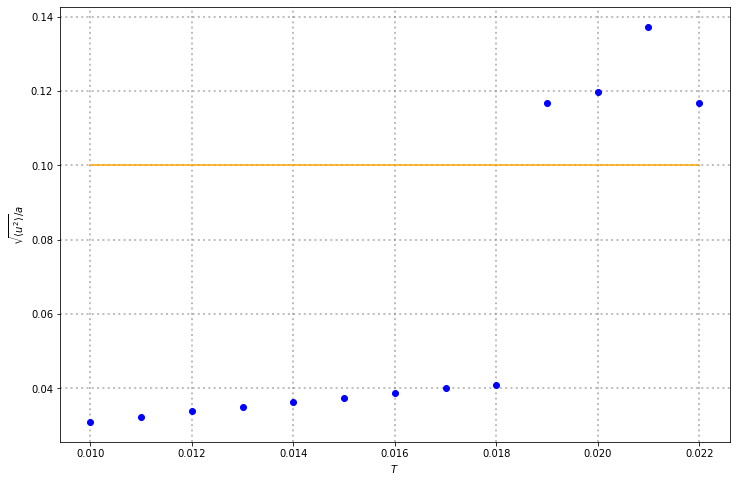

In [119]:
plt.plot(data/1000+0.01, du, "bo")
plt.plot(data/1000+0.01, np.full(len(data),0.1), color="orange")
plt.rcParams['figure.figsize'] = [12, 8]
plt.grid(b=True, color='Grey', alpha=0.5, linestyle=':', linewidth=2)
plt.xlabel(r"$T$")
plt.ylabel(r"$\sqrt{\langle u^{2}\rangle}/a$")
#plt.ylim(0,2)
#plt.xlim(0.2,2)
#plt.show()
plt.savefig("./report/images/lind.png")

In [135]:
data = np.arange(1, 20, 1)
print(data)
data=[1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]
names = ["melting2/"+str(i)+".xyz" for i in data]
frames = 299
particles = 512
x = np.zeros((len(data), particles,frames))
y = np.zeros((len(data), particles,frames))
z = np.zeros((len(data), particles,frames))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [136]:
for j in tqdm(range(0, len(data)), desc="File"):
    with open(names[j], "r") as file:
        for frame in tqdm(range(0,frames), desc="Frame", leave=False):
            try:
                n = int(file.readline())
            except:
                break
            file.readline()

            coord = []

            for i in range(0,n):
                line = file.readline()
                coord = [float(j) for j in line.split(" ")]

                x[j][i][frame] = coord[0]
                y[j][i][frame] = coord[1]

                z[j][i][frame] = coord[2]

In [137]:
dr = np.zeros((len(data), particles))

for dat in tqdm(range(0, len(data)), desc="File"):
    for i in tqdm(range(0,particles), desc="Frame", leave=False):
        dr[dat][i]=(np.square((x[dat][i]- x[dat][i].mean()))).mean()
        dr[dat][i]=(np.square((y[dat][i]- y[dat][i].mean()))).mean()
        dr[dat][i]=(np.square((z[dat][i]- z[dat][i].mean()))).mean()

In [141]:
a = 8*0.25*2**0.5/(512**(1/3)/8)#512**(1/3)/(0.25*5*2)
du = np.zeros(len(data))
for dat in range(0, len(data)):
    du[dat] = np.sqrt(dr[dat].mean())/a
print(du)
#k, b = np.polyfit(data[0:12]/10, du[0:12], 1)

[0.24740958 0.25745439 0.25437127 0.25935752 0.26244844 0.27402443
 0.27398161 0.28216628 0.29299352 0.31126772 0.30573666 0.32235844
 0.35128391 0.3724102  0.34798626 0.36988386 0.46142678 0.45918188]


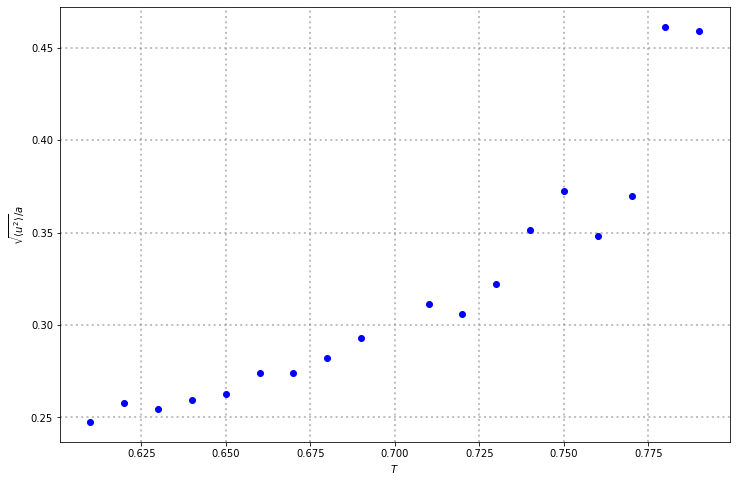

In [143]:
plt.plot(np.array(data)/100+0.6, du, "bo")
#plt.plot(np.array(data)/1000+0.01, np.full(len(data),0.1), color="orange")
plt.rcParams['figure.figsize'] = [12, 8]
plt.grid(b=True, color='Grey', alpha=0.5, linestyle=':', linewidth=2)
plt.xlabel(r"$T$")
plt.ylabel(r"$\sqrt{\langle u^{2}\rangle}/a$")
#plt.ylim(0,2)
#plt.xlim(0.2,2)
#plt.show()
plt.savefig("./report/images/lind_high.png")